# Seaborn
https://elitedatascience.com/python-seaborn-tutorial

In [1]:
!pip install seaborn

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
!wget "https://elitedatascience.com/wp-content/uploads/2017/04/Pokemon.csv"

--2019-02-05 05:28:49--  https://elitedatascience.com/wp-content/uploads/2017/04/Pokemon.csv
Resolving elitedatascience.com (elitedatascience.com)... 104.25.248.13, 104.25.249.13, 2606:4700:20::6819:f80d, ...
Connecting to elitedatascience.com (elitedatascience.com)|104.25.248.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7992 (7.8K) [text/csv]
Saving to: ‘Pokemon.csv’

Pokemon.csv         100%[=====================>]   7.80K  --.-KB/s   in 0s     

2019-02-05 05:28:49 (47.3 MB/s) - ‘Pokemon.csv’ saved [7992/7992]



In [13]:
df=pd.read_csv("Pokemon.csv",encoding = 'unicode_escape',index_col=0)

In [14]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [15]:
df.shape

(151, 12)

In [16]:
df.tail()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False


In [17]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


### Scatter plot

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


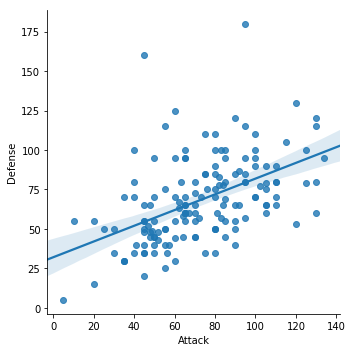

In [18]:
#Recommended Way
sns.lmplot(x='Attack',y='Defense',data=df)

Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the lmplot():

First, we'll set fit_reg=False to remove the regression line, since we only want a scatter plot.
Then, we'll set hue='Stage' to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.

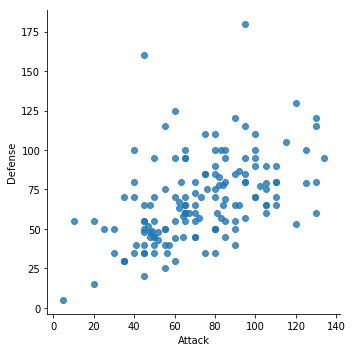

In [21]:
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False)

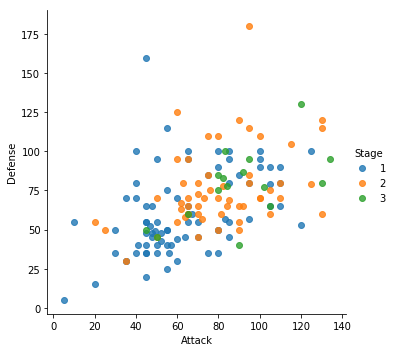

In [22]:
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False,hue='Stage')

Looking better, but we can improve this scatter plot further. For example, all of our Pokémon have positive Attack and Defense values, yet our axes limits fall below zero. Let's see how we can fix that...

### Step 4: Customizing with Matplotlib.
Remember, Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib.

Setting your axes limits is one of those times, but the process is pretty simple:

First, invoke your Seaborn plotting function as normal.</br>
Then, invoke Matplotlib's customization functions. In this case, we'll use its ylim() and xlim() functions.
Here's our new scatter plot with sensible axes limits:

Customizing with Matplotlib

(0, 190.44212186867063)

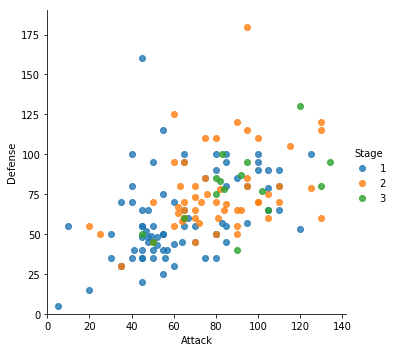

In [23]:
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False,hue='Stage')
plt.xlim(0,None)
plt.ylim(0,None)

(0, 190.44212186867063)

<Figure size 1080x720 with 0 Axes>

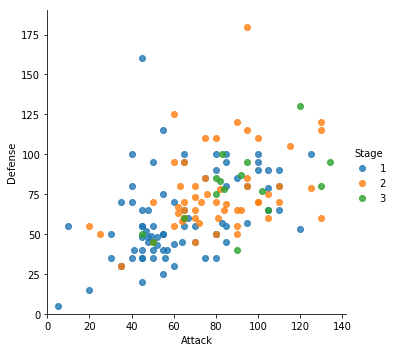

In [25]:
plt.figure(figsize=(15,10))
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False,hue='Stage')
plt.xlim(0,None)
plt.ylim(0,None)


## Step 5: The role of Pandas.
Even though this is a Seaborn tutorial, Pandas actually plays a very important role. You see, Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted.

For example, let's say we wanted to make a box plot for our Pokémon's combat stats:

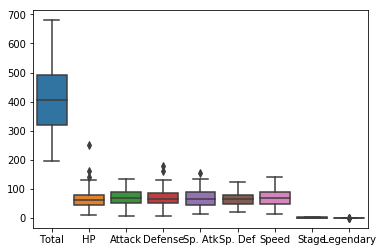

In [28]:
# Boxplot

sns.boxplot(data=df)

Well, that's a reasonable start, but there are some columns we'd probably like to remove:

We can remove the Total since we have individual stats.
We can remove the Stage and Legendary columns because they aren't combat stats.
In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your DataFrame.

Let's create a new DataFrame called stats_df that only keeps the stats columns:

In [29]:
stats_df=df.drop(['Total','Stage','Legendary'], axis=1)

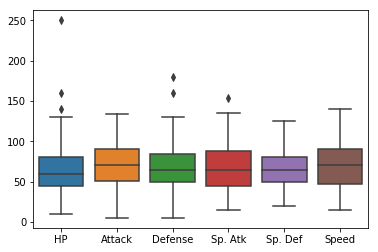

In [31]:
sns.boxplot(data=stats_df)

## Step 6: Seaborn themes.
Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called 'darkgrid'.

Next, we'll change the theme to 'whitegrid' while making a violin plot.

Violin plots are useful alternatives to box plots.
They show the distribution (through the thickness of the violin) instead of only the summary statistics.
For example, we can visualize the distribution of Attack by Pokémon's primary type:

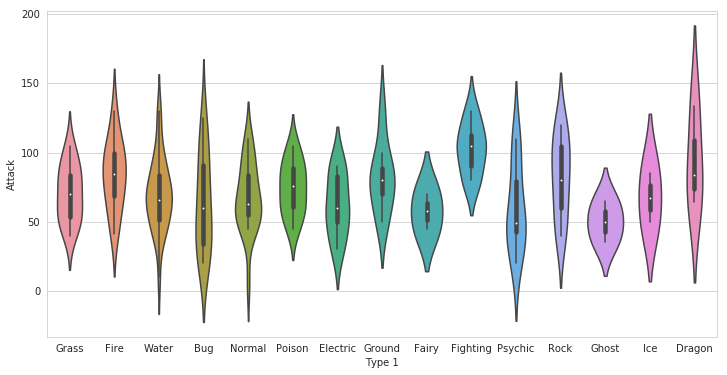

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.violinplot(x='Type 1',y='Attack',data=df)

In [35]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


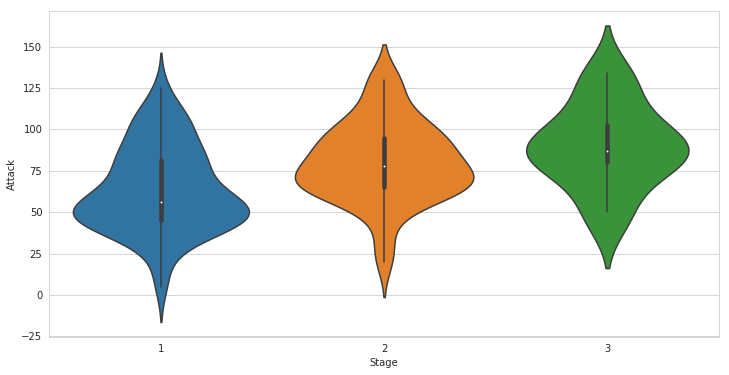

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.violinplot(x='Stage',y='Attack',data=df)

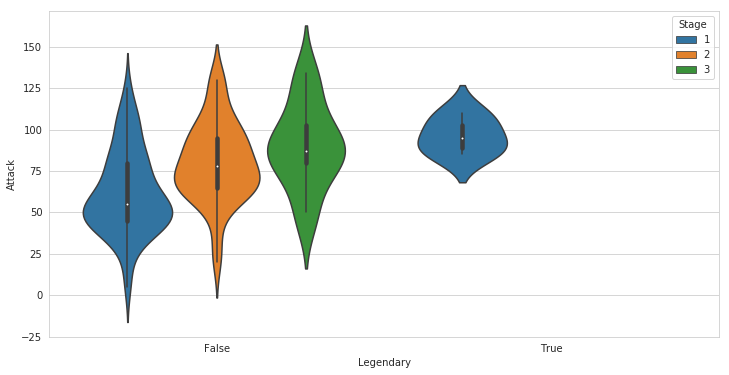

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.violinplot(x='Legendary',y='Attack',data=df,hue='Stage')

##  Step 7: Color palettes.
Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered Python list of color hex values.

Let's use Bulbapedia to help us create a new color palette:

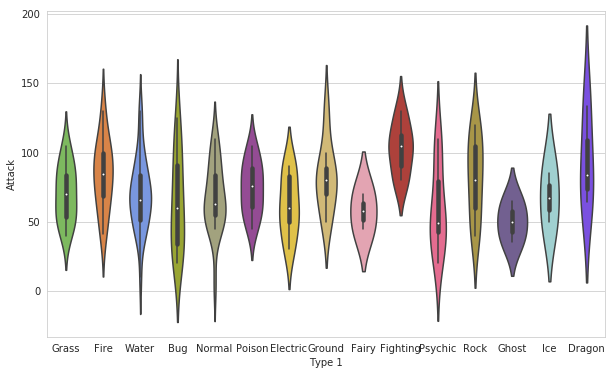

In [47]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
plt.figure(figsize=(10,6))
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

Much better!</br>

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the swarm plot comes in. This visualization will show each point, while "stacking" those with similar values:

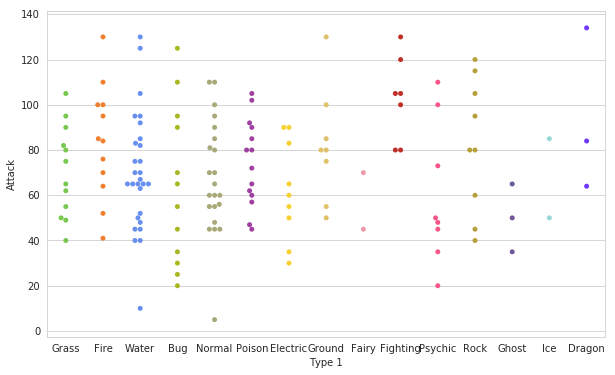

In [50]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Type 1',y='Attack',data=df, palette=pkmn_type_colors)


That's handy, but can't we combine our swarm plot and the violin plot? After all, they display similar information, right?

## Step 8: Overlaying plots.
The answer is yes.

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

First, we'll make our figure larger using Matplotlib.</br>
Then, we'll plot the violin plot. However, we'll set inner=None to remove the bars inside the violins.</br>
Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.</br>
Finally, we'll set a title using Matplotlib.</br>

Text(0.5, 1.0, 'Attack by Type')

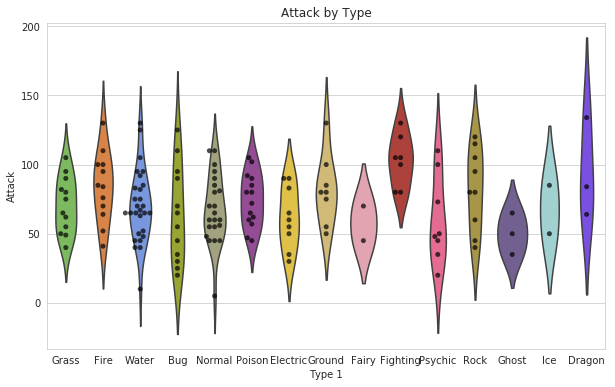

In [51]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')


Awesome, now we have a pretty chart that tells us how Attack values are distributed across different Pokémon types. But what it we want to see all of the other stats as well?

## Step 9: Putting it all together.
Well, we could certainly repeat that chart for each stat. But we can also combine the information into one chart... we just have to do some data wrangling with Pandas beforehand.

First, here's a reminder of our data format:

In [52]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


As you can see, all of our stats are in separate columns. Instead, we want to "melt" them into one column.

To do so, we'll use Pandas's melt() function. It takes 3 arguments:</br>

First, the DataFrame to melt.</br>
Second, ID variables to keep (Pandas will melt all of the other ones).</br>
Finally, a name for the new, melted variable.</br>
Here's the output:</br>

In [101]:
melted_df=pd.melt(stats_df,id_vars=['Name',"Type 1","Type 2"], # Variables to keep
                  var_name="Stat"# Name of melted variable
                 )

In [102]:
melted_df.shape

(906, 5)

In [103]:
melted_df.head(5)

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [104]:
melted_df[melted_df['Name']=='Bulbasaur'] # all he variables have been melted 

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
151,Bulbasaur,Grass,Poison,Attack,49
302,Bulbasaur,Grass,Poison,Defense,49
453,Bulbasaur,Grass,Poison,Sp. Atk,65
604,Bulbasaur,Grass,Poison,Sp. Def,65
755,Bulbasaur,Grass,Poison,Speed,45


In [105]:
xx=stats_df.copy()

In [106]:
import numpy as np


In [107]:
xx.loc[xx['Name']=='Bulbasaur','HP']=np.nan
# df.loc[df[<some_column_name>] == <condition>, [<another_column_name>]] = <value_to_add>

In [108]:
xx[xx['Name']=='Bulbasaur']

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,NaN,49,49,65,65,45


In [109]:
melted_xx=pd.melt(xx,id_vars=['Name',"Type 1","Type 2"], # Variables to keep
                  var_name="Stat"# Name of melted variable,
                 )

In [110]:
melted_xx[melted_df['Name']=='Bulbasaur'] # all he variables have been melted 

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,NaN
151,Bulbasaur,Grass,Poison,Attack,49.0
302,Bulbasaur,Grass,Poison,Defense,49.0
453,Bulbasaur,Grass,Poison,Sp. Atk,65.0
604,Bulbasaur,Grass,Poison,Sp. Def,65.0
755,Bulbasaur,Grass,Poison,Speed,45.0


In [111]:

print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


...you'll find that melted_df has 6 times the number of rows as stats_df.

Now we can make a swarm plot with melted_df.

But this time, we're going to set x='Stat' and y='value' so our swarms are separated by stat.
Then, we'll set hue='Type 1' to color our points by the Pokémon type.

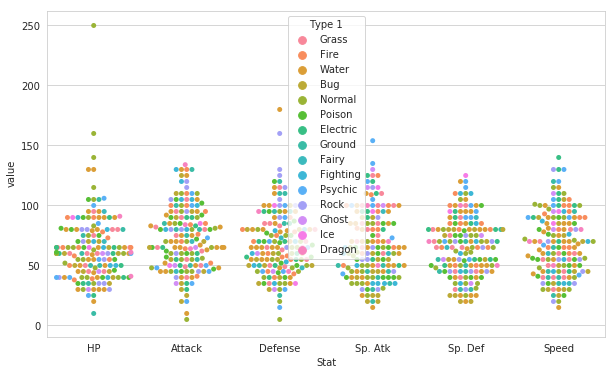

In [113]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

/home/jupyterlab/conda/lib/python3.6/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


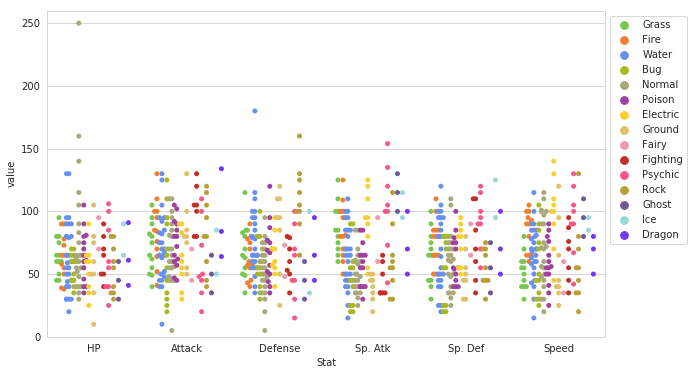

In [114]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

/home/jupyterlab/conda/lib/python3.6/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


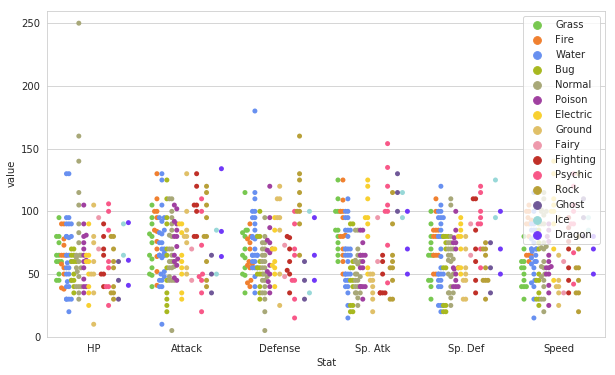

In [116]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)

plt.legend(bbox_to_anchor=(1, 1), loc=1)

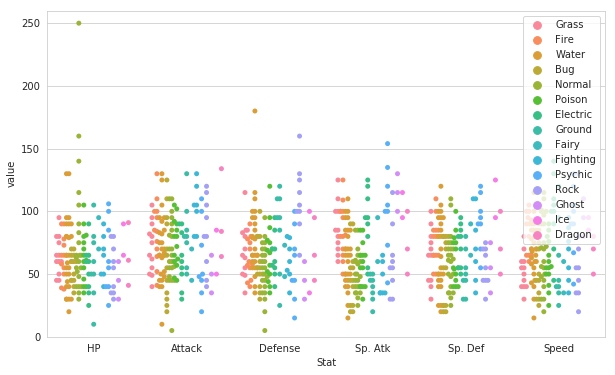

In [118]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              ) 
 
# 4. Adjust the y-axis
plt.ylim(0, 260)

plt.legend(bbox_to_anchor=(1, 1), loc=1)

## Step 10: Pokédex (mini-gallery).
We're going to conclude this tutorial with a few quick-fire data visualizations, just to give you a sense of what's possible with Seaborn.

10.1 - Heatmap
Heatmaps help you visualize matrix-like data.

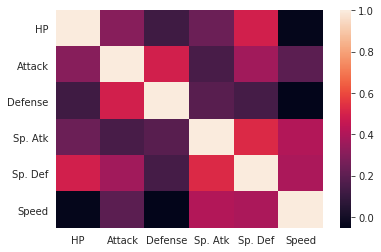

In [121]:
stats_corr=stats_df.corr()
sns.heatmap(stats_corr)

## 10.2 - Histogram
Histograms allow you to plot the distributions of numeric variables.



/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


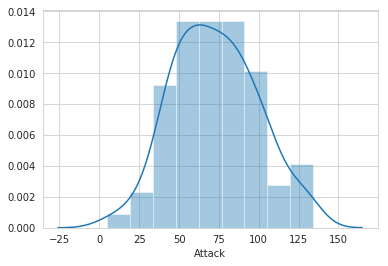

In [122]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

### 10.3 - Bar Plot
Bar plots help you visualize the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

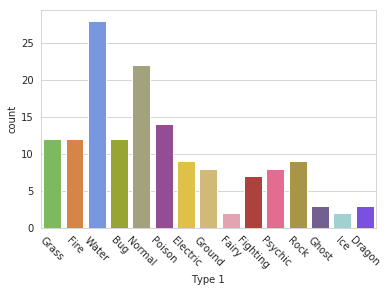

In [124]:
sns.countplot(x="Type 1",data=df, palette=pkmn_type_colors)
plt.xticks(rotation=-45)

### 10.4 - Factor Plot
Factor plots make it easy to separate plots by categorical classes.`

In [133]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary'],
      dtype='object')

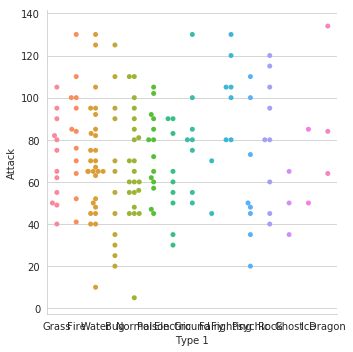

In [136]:
# Factor Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
#                 col='Stage',
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
# g.set_xticklabels(rotation=-45)

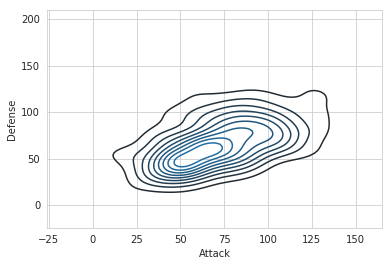

In [137]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

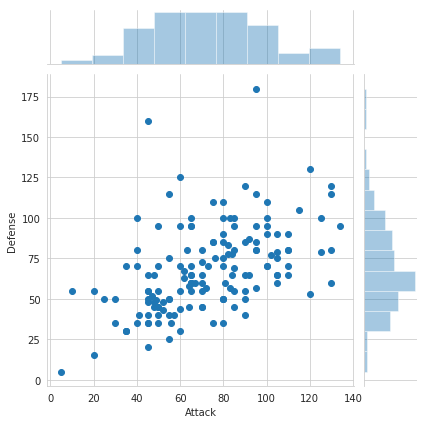

In [138]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)